#  The simple linear regression model (SLR)

### Econometrics A (ØkA)

Wooldridge (Ch. 2)

Bertel Schjerning

Department of Economics, University of Copenhagen


# Part 1: Timeløn og uddannelse (OLS estimation)

### Eksempel 1: Timeløn og uddannelse
Estimation af simpel model for timeløn og uddannelse:
$$
		\text{timeløn}_i = \beta _{0}+\beta _{1}\text{uddannelse}_i+u_i
$$
- Vi benytter data fra Danmarks Statistik.
    - Data indeholder $N=1.078$ tilfældigt udvalgte personer i 1994.	
	- For hvert individ, $i$, har vi information om timelønnen, køn, antal årsuddannelse, single, alder og erhvervserfaring.
- Datasættet er afgrænset således:
    - 20-68 årige.			
	- Lønmodtagere.			
	- Timeløn på mere end 40 kr.

### Indlæs data og relevante libraries 

In [2]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_stata(r"../data/wage.dta") 
data['const'] = 1

# Descriptive statistics
descriptive_stats = data.describe()

# Display the descriptive statistics
display(descriptive_stats)

,sex,age,wage,educ,experience,single,const
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.0
mean,1.479592,39.302412,139.192950,11.449907,14.626375,0.258813,1.0
std,0.499815,11.068010,47.357094,3.311553,8.564899,0.438186,0.0
min,1.000000,20.000000,44.000000,0.000000,0.139000,0.000000,1.0
25%,1.000000,30.000000,110.000000,10.000000,7.833750,0.000000,1.0
50%,1.000000,39.000000,129.000000,12.000000,13.823500,0.000000,1.0
75%,2.000000,48.000000,159.000000,13.000000,20.913500,1.000000,1.0
max,2.000000,68.000000,300.000000,18.000000,31.000000,1.000000,1.0


###  OLS estimator for den simple lineære regressions model
Model
$$
y=\beta _{0}+\beta_{1}x+u
$$

OLS estimator (slope)
$$
\hat{\beta}_{1} = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}} = \frac{\widehat{\text{cov}}(x_i,y_i)}{\widehat{\text{var}}(x_i)} 
$$

OLS estimator (intercept)
$$
\hat{\beta}_{0} = \bar{y} - \hat{\beta}_{1} \bar{x}
$$

### Simpel OLS - direkte beregning vha NumPy

In [3]:
# Forbered data til OLS - konverter fra dataframe til numpy array
y = data['wage'].values   
X = data['educ'].values

# Beregn variansen af X (educ)
var_X = np.sum((X - np.mean(X)) ** 2) / len(X)

# og kovariansen mellem X (educ) og y (wage)
cov_XY = np.sum((X - np.mean(X)) * (y - np.mean(y))) / len(X)

# OLS estimater af beta0 (intercept) og beta1 (hældning)
bhat1 = cov_XY / var_X
bhat0 = np.mean(y) - bhat1 * np.mean(X)

# Udskriv resultater
print(f"cov_XY:        {cov_XY:8.4f}")
print(f"var_X:         {var_X:8.4f}\n")
print(f"bhat0 (const): {bhat0:8.4f}")
print(f"bhat1 (educ):  {bhat1:8.4f}")

cov_XY:         46.7499
var_X:          10.9562

bhat0 (const):  90.3364
bhat1 (educ):    4.2670


### OLS regression ved brug af OLS fra linearmodels

In [4]:
from linearmodels import OLS

# OLS estimation vha OLS fra linearmodels
model_lm = OLS(data['wage'], data[['const', 'educ']]).fit(cov_type='unadjusted') # Bed om ols standardfejl, default er robuste
print(model_lm.summary)


ModuleNotFoundError: No module named 'linearmodels'

### OLS regression ved brug af OLS fra statsmodels

In [4]:
import statsmodels.api as sm

# OLS estimation vha OLS fra statsmodels
model_sm = sm.OLS(data['wage'], data[['const', 'educ']]).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     105.2
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.32e-23
Time:                        02:57:14   Log-Likelihood:                -5637.5
No. Observations:                1078   AIC:                         1.128e+04
Df Residuals:                    1076   BIC:                         1.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3364      4.959     18.215      0.0

# Part 2: Timeløn og uddannelse (Goodness of fit)

### Godness of fit, $R^2$
Total sum of squares (i $y$): $$SST \equiv \sum_{i=1}^{n}(y_{i}-\bar{y})^{2}$$
Explained sum of squares: $$SSE \equiv \sum_{i=1}^{n}(\hat{y}_{i}-\bar{y})^{2}$$
Residual sum of squares: $$SSR \equiv \sum_{i=1}^{n}\hat{u}_{i}^{2}$$
Godness of fit $$R^2 \equiv \frac{SSE}{SST} = 1 - \frac{SSR}{SST}$$

### SST, SSE, SSR og $R^2$ - direkte beregning vha NumPy

In [5]:
# Forudsagte værdier (y-hat)
yhat = bhat0 + bhat1 * X

# Godness of fit
SST = np.sum((y - np.mean(y)) ** 2)     # Total sum of squres
SSE = np.sum((yhat - np.mean(y)) ** 2)  # Forklaret sum of squares
SSR = np.sum((y - yhat) ** 2)           # Residual sum of squares
R2 = SSE / SST                          # Forklaringsgrad

# Udskriv resultater
print(f"SST (Total sum of squares):     {SST:15.2f}")
print(f"SSE (Explained sum of squares): {SSE:15.2f}")
print(f"SSR (Residual ssum of squares): {SSR:15.2f}")
print(f"R^2 (Goodness of fit):          {R2:15.4f}")


SST (Total sum of squares):          2415381.87
SSE (Explained sum of squares):       215040.48
SSR (Residual ssum of squares):      2200341.38
R^2 (Goodness of fit):                   0.0890


### Sammenling med statsmodels

In [6]:
# Access SST, SSE, SSR, and R^2 from model_sm
SST_sm = model_sm.ess + model_sm.ssr  # Total Sum of Squares (SST)
SSR_sm = model_sm.ssr                 # Residual Sum of Squares (SSR)
SSE_sm = model_sm.ess                 # Explained Sum of Squares (SSE)
R2_sm = model_sm.rsquared             # R^2
print(f"SST (Total sum of squares):     {SST_sm:15.2f}")
print(f"SSE (Explained sum of squares): {SSE_sm:15.2f}")
print(f"SSR (Residual ssum of squares): {SSR_sm:15.2f}")
print(f"R^2 (Goodness of fit):          {R2_sm:15.4f}")


SST (Total sum of squares):          2415381.87
SSE (Explained sum of squares):       215040.48
SSR (Residual ssum of squares):      2200341.38
R^2 (Goodness of fit):                   0.0890


### Summary output for linearmodels og statsmodels
- $R^2$ og meget andet findes i summary output 
- Men ikke TSS, ESS, RSS, og mange andre ting
- Med NumPy kan alt lade sig gøre, hvis du kender formlen i Wooldridge

In [7]:
print(model_sm.summary()) # uncomment to see output from statsmodels
#print(model_lm.summary)  # uncomment to see output from linearmodels


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     105.2
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.32e-23
Time:                        02:57:14   Log-Likelihood:                -5637.5
No. Observations:                1078   AIC:                         1.128e+04
Df Residuals:                    1076   BIC:                         1.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3364      4.959     18.215      0.0

# Part 3: Timeløn og uddannelse (Varians og standard fejl)

### Residual Varians, Variansen af OLS-estimatoren, Standardfejl

Givet vores model:
$$
y_i = \beta_0 + \beta_1 x_i + u_i
$$

Residual variansen estimeres som:
$$
\hat{\sigma}^2 = \frac{1}{n-2} \sum_{i=1}^{n} \hat{u}_i^2
$$

Variansen af OLS-estimatorerne:
$$
Var(\hat{\beta}_1 \mid X) = \frac{\hat{\sigma}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$
$$
Var(\hat{\beta}_0 \mid X) = \frac{\hat{\sigma}^2 \cdot \frac{1}{n}\sum_{i=1}^{n}x_{i}^{2}}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

Standardfejlene for OLS-estimatorerne:
$$
se(\hat{\beta}_1) = \sqrt{Var(\hat{\beta}_1 \mid X)}
$$
$$
se(\hat{\beta}_0) = \sqrt{Var(\hat{\beta}_0 \mid X)}
$$



### Implementer disse i NumPy

In [8]:
n = len(y)
X_mean = np.mean(X)
X_squared_sum = np.sum(X**2)

# Beregn residual varians
residuals = y - (bhat0 + bhat1 * X)
sigma_squared_hat = np.sum(residuals**2) / (n - 2)

# Beregn varians og standardfejl for OLS-estimatorerne
SST_x = np.sum((X - X_mean)**2)
se_beta1 = np.sqrt(sigma_squared_hat / SST_x)
se_beta0 = np.sqrt(sigma_squared_hat * (1/n * X_squared_sum / SST_x))

# Print resultater
print(f"{'Parameter':<20} {'Estimate':>10} {'Std. Error':>15} {'Varians':>15}")
print(f"{'-'*70}")
print(f"{'bhat0 (const)':<20} {bhat0:>10.4f} {se_beta0:>15.4f} {(se_beta0**2):>15.4f}")
print(f"{'bhat1 (educ)':<20} {bhat1:>10.4f} {se_beta1:>15.4f} {(se_beta1**2):>15.4f}")
print(f"{'Residual Varians':<20} {'-':>10} {sigma_squared_hat:>15.4f}")

Parameter              Estimate      Std. Error         Varians
----------------------------------------------------------------------
bhat0 (const)           90.3364          4.9594         24.5957
bhat1 (educ)             4.2670          0.4161          0.1731
Residual Varians              -       2044.9269


### Lad os samle alt i en funtion, som kan bruges til OLS estimation af SLR

In [2]:
import numpy as np
import pandas as pd


def OLS_SLR(y, X, quiet=False):
    # Antagelse: y og X er pandas Series
    # Eksempel på brug af af OLS_SLR
    # result = OLS_SLR(data['wage'], data['educ'])
    n = len(y)
    X_name = X.name
    y_name = y.name
    
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    X_squared_sum = np.sum(X**2)
    
    # Beregn beta_1 og beta_0
    bhat1 = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
    bhat0 = y_mean - bhat1 * X_mean
    
    # Residualer og residual varians
    residuals = y - (bhat0 + bhat1 * X)
    SSR = np.sum(residuals**2)
    sigma_squared_hat = SSR / (n - 2)
    sigma_hat = np.sqrt(sigma_squared_hat)  # Kvadratrod af residual variansen
    
    # Beregn varians og standardfejl for OLS-estimatorerne
    SST_x = np.sum((X - X_mean)**2)
    se_beta1 = np.sqrt(sigma_squared_hat / SST_x)
    se_beta0 = np.sqrt(sigma_squared_hat * (1/n + X_mean**2 / SST_x))
    
    # Beregn R^2, SST, SSE
    SST = np.sum((y - y_mean)**2)
    SSE = SST - SSR
    R_squared = SSE / SST
    
    # Print output hvis quiet=False
    if not quiet:
        print(f"OLS estimation of SLR model using pandas and numpy\n")
        print(f"{'Parameter':<20} {'Estimate':>10} {'Std. Error':>15} {'Variance':>15}")
        print(f"{'-'*70}")
        print(f"{f'bhat0 (const)':<20} {bhat0:>10.4f} {se_beta0:>15.4f} {(se_beta0**2):>15.4f}")
        print(f"{f'bhat1 ({X_name})':<20} {bhat1:>10.4f} {se_beta1:>15.4f} {(se_beta1**2):>15.4f}")
        print(f"\nR^2: {R_squared:.4f}")
        print(f"Residual Varians: {sigma_squared_hat:.4f}")
        print(f"Sigma_hat (σ̂): {sigma_hat:.4f}")
        print(f"SSR: {SSR:.4f}, SST: {SST:.4f}, SSE: {SSE:.4f}")
    
    # Returner resultater
    return {
        'beta_0': bhat0,
        'beta_1': bhat1,
        'se_beta0': se_beta0,
        'se_beta1': se_beta1,
        'sigma_squared_hat': sigma_squared_hat,  # Residual varians
        'sigma_hat': sigma_hat,  # Kvadratrod af residual varians
        'R_squared': R_squared,
        'SSR': SSR,
        'SST': SST,
        'SSE': SSE
    }

### Lad os nu sammenligne output fra OLS_SLR og OLS fra statsmodels

In [10]:
result = OLS_SLR(data['wage'], data['educ'])
print("\nSumamry output from statsmodels")
print(model_sm.summary())

OLS estimation of SLR model using pandas and numpy

Parameter              Estimate      Std. Error        Variance
----------------------------------------------------------------------
bhat0 (const)           90.3364          4.9594         24.5957
bhat1 (educ)             4.2670          0.4161          0.1731

R^2: 0.0890
Residual Varians: 2044.9269
Sigma_hat (σ̂): 45.2209
SSR: 2200341.3819, SST: 2415381.8664, SSE: 215040.4846

Sumamry output from statsmodels
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     105.2
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.32e-23
Time:                        02:57:14   Log-Likelihood:                -5637.5
No. Observations:                1078   AIC:              

# Part 4: Simulationsstudie (egenskaber ved OLS estimator)

### Monte Carlo Simulation: OLS Estimator Properties
#### Experimental Design:
- **Sample Size:** $n = 100$
- **Number of Simulations:** $M = 1000$
- **True Model:** $y_i = \beta_0 + \beta_1 x_i + u_i$, $u_i \sim \mathcal{N}(0, \sigma_u^2)$
- **Various options:**
  - $x_i$ generated from a specified distribution (`uniform` or `normal`).
  - Option to introduce correlation between $x_i$ and $u_i$: $\text{corr}(x_i, u_i) \neq 0$.
  - Option to introduce heteroskedasticity: $\text{Var}(u_i \mid x_i)$ depends on $x_i$.
- **Procedure:**
  1. Estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ in each simulation.
  2. Analyze distributions of the estimates and their standard errors.

#### Outputs:
- Histograms of $\hat{\beta}_0$, $\hat{\beta}_1$, and their standard errors.
- Summary table comparing mean estimates, standard deviations, and true values.


### Monte Carlo (would take us too far to go through it in lectures)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def monte_carlo_OLS(n=100, M=1000, beta0=2, beta1=3, sigma_u=1, x_dist='uniform', x_params=(0, 10), 
                    corr_ux=0, heteroskedastic=False, fontsize=20, quiet=False):
    """
    Monte Carlo simulation to study the properties of the OLS estimator.
    
    Parameters:
        n (int): Sample size for each simulation.
        M (int): Number of simulations.
        beta0 (float): True value of intercept.
        beta1 (float): True value of slope.
        sigma_u (float): Standard deviation of the error term u.
        x_dist (str): Distribution of X ('uniform' or 'normal').
        x_params (tuple): Parameters for the X distribution.
            - If 'uniform': (low, high)
            - If 'normal': (mean, std_dev)
        corr_ux (float): Correlation between u and x.
        heteroskedastic (bool): If True, introduce heteroskedasticity in the error term.
        fontsize (int): Font size for the plots.
        quiet (bool): If True, suppress printed output.
    
    Returns:
        summary_table (DataFrame): Summary of the Monte Carlo simulation results.
    """
    
    # Store estimates and standard errors
    beta0_estimates = []
    beta1_estimates = []
    se_beta0_estimates = []
    se_beta1_estimates = []
    
    # Generate X values based on the specified distribution
    if x_dist == 'uniform':
        X_generator = lambda: np.random.uniform(x_params[0], x_params[1], size=n)
    elif x_dist == 'normal':
        X_generator = lambda: np.random.normal(x_params[0], x_params[1], size=n)
    else:
        raise ValueError("x_dist must be 'uniform' or 'normal'")
    
    # Run simulations
    for _ in range(M):
        X = X_generator()
        
        if corr_ux != 0:
            u = np.random.normal(0, sigma_u, size=n) + corr_ux * X
        else:
            u = np.random.normal(0, sigma_u, size=n)
        
        if heteroskedastic:
            u = u * np.abs(X)
        
        y = beta0 + beta1 * X + u
        
        result = OLS_SLR(pd.Series(y, name='y'), pd.Series(X, name='X'), quiet=True)
        
        beta0_estimates.append(result['beta_0'])
        beta1_estimates.append(result['beta_1'])
        se_beta0_estimates.append(result['se_beta0'])
        se_beta1_estimates.append(result['se_beta1'])
    
    # Convert lists to arrays for easier analysis
    beta0_estimates = np.array(beta0_estimates)
    beta1_estimates = np.array(beta1_estimates)
    se_beta0_estimates = np.array(se_beta0_estimates)
    se_beta1_estimates = np.array(se_beta1_estimates)
    
    # Plot histograms for beta0 and beta1 estimates
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(beta0_estimates, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(beta0, color='red', linestyle='dashed', linewidth=2)
    plt.title(r'Histogram of $\hat{\beta}_0$', fontsize=fontsize)
    plt.xlabel(r'$\hat{\beta}_0$', fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    
    plt.subplot(1, 2, 2)
    plt.hist(beta1_estimates, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(beta1, color='red', linestyle='dashed', linewidth=2)
    plt.title(r'Histogram of $\hat{\beta}_1$', fontsize=fontsize)
    plt.xlabel(r'$\hat{\beta}_1$', fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    
    plt.tight_layout()
    plt.show()
    
    # Plot histograms for standard errors
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(se_beta0_estimates, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(np.std(beta0_estimates), color='red', linestyle='dashed', linewidth=2)
    plt.title(r'Histogram of Standard Errors of $\hat{\beta}_0$', fontsize=fontsize)
    plt.xlabel(r'Standard Error of $\hat{\beta}_0$', fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    
    plt.subplot(1, 2, 2)
    plt.hist(se_beta1_estimates, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(np.std(beta1_estimates), color='red', linestyle='dashed', linewidth=2)
    plt.title(r'Histogram of Standard Errors of $\hat{\beta}_1$', fontsize=fontsize)
    plt.xlabel(r'Standard Error of $\hat{\beta}_1$', fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    
    plt.tight_layout()
    plt.show()
    
    # Create a summary table
    summary_table = pd.DataFrame({
        'Parameter': ['beta0', 'beta1'],
        'True Value': [beta0, beta1],
        'Mean Estimate': [np.mean(beta0_estimates), np.mean(beta1_estimates)],
        'MC Standard Deviation': [np.std(beta0_estimates), np.std(beta1_estimates)],
        'Average SE': [np.mean(se_beta0_estimates), np.mean(se_beta1_estimates)]
    })
    
    if not quiet:
        print(summary_table)
    
    return summary_table

### Undersøg OLS-estimatorens Egenskaber

#### Quiz: Undersøg OLS-estimatorens Egenskaber

Brug Monte Carlo-simulationskoden til at undersøge følgende scenarier. Besvar spørgsmålene ud fra dine observationer:

1. Ser OLS-estimaterne ud til at være middelrette i små stikprøver? Hvad med standardfejlene?
2. Hvordan påvirker en øget varians i $x$ variansen og standardfejlen af $\hat{\beta}_1$?
3. Hvad sker der med variansen og standardfejlen af $\hat{\beta}_1$, når variansen af $u$ øges?
4. Hvordan påvirker en forøgelse af stikprøvestørrelsen $n$ variansen og standardfejlen af $\hat{\beta}_1$?
5. Hvordan påvirker introduktion af korrelation mellem $x$ og $u$ ($\text{corr}(x, u) \neq 0$) skævheden og variansen af $\hat{\beta}_1$?
6. Undersøg effekterne af heteroskedasticitet på standardfejlene af $\hat{\beta}_0$ og $\hat{\beta}_1$. Hvilke forskelle observerer du sammenlignet med den homoskedastiske case?

#### Instruktioner:
- Juster parametrene i simulationskoden og kør flere eksperimenter.
- Analyser de genererede histogrammer og opsummeringstabeller.
- Sammenlign de empiriske resultater med de teoretiske forventninger, vi har diskuteret i undervisningen.


For at ændre variansen i x, i koden nedenfor, kan vi det andet tal i x_params.

For at ændre variansen af u, kan vi ændre sigma_u

4. Den bliver mindre.

5. Den bliver bias.

### Lad os undersøge egenskaberne ved OLS og OLS standardfejlene

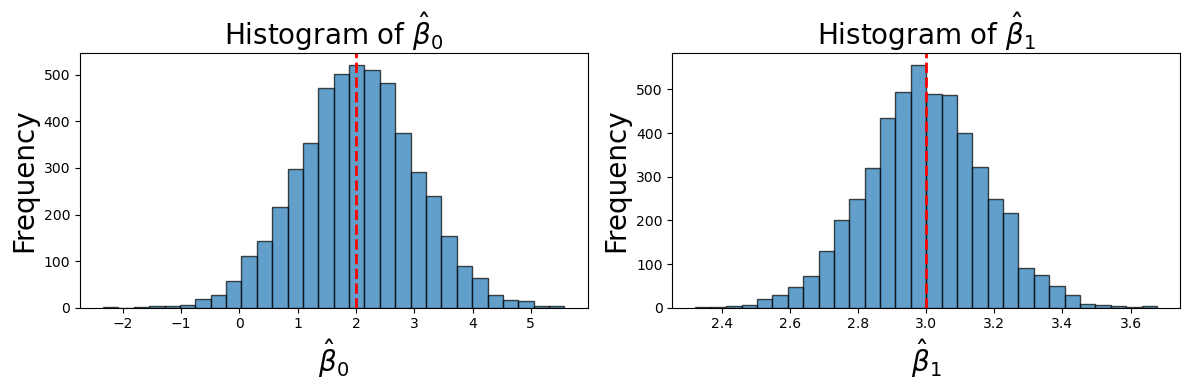

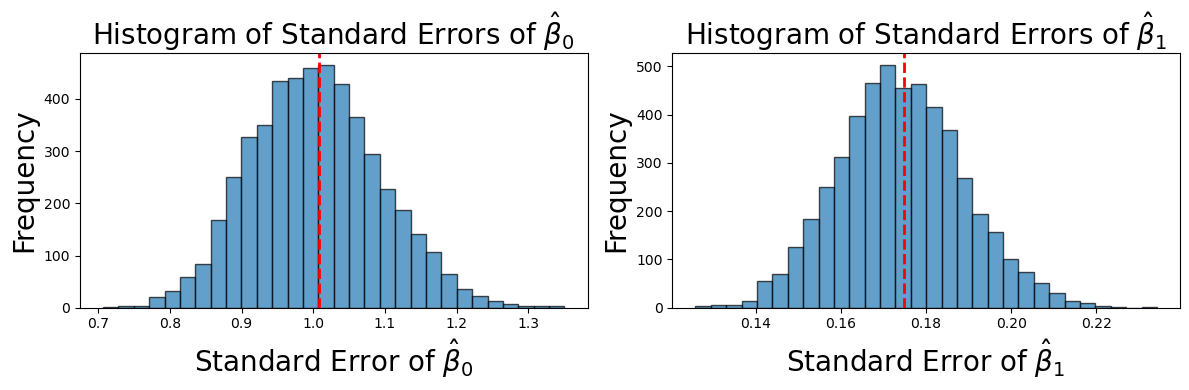

  Parameter  True Value  Mean Estimate  MC Standard Deviation  Average SE
0     beta0           2       2.023964               1.008458    1.003723
1     beta1           3       2.996798               0.174884    0.174084


In [10]:
# Modify parameter and run the code
summary = monte_carlo_OLS(
    n=100, M=5000, beta0=2, beta1=3, sigma_u=1, 
    x_dist='uniform', x_params=(0, 10), 
    corr_ux=0.0, heteroskedastic=False, quiet=False)
